In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import norm
from scipy.stats import beta
np.random.seed(123)
from plotly.subplots import make_subplots
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf


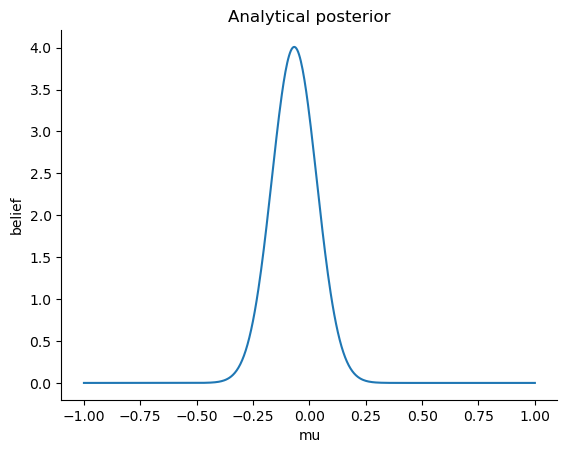

In [18]:
data = np.random.randn(100)
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1.0 / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

<h1> Frequentist statistic </h1>
Assume $\theta$, parameter with regards to test statistic to be some global constant. 
E.g
given
$X = [10,13,14,15,16,15]$
assume $\theta = \mu = 14$, then we perform some type of test that yield some probability/ interval that relates to the paremeter.

### <span style="color: green;">Advantages:</span>
    - Straight forward computation
    - Intuitive
### <span style="color: red;">Disadvantages:</span>
    - Slow convergence?
    - Not clear relation to probability, why does it mean 95% of the time the true mean will be in this interval, and are they equally likely to be the case?
    - only use one instance of sampling, suppose we sample alot of time then how do we
    - Assume constant to be static: some time there is noise in the measurement, or sometime there is an underlying distribution that the parameters are being drawn from.



<h1> Bayesian Statistic </h1>

Bayesian rules is given by 
$$P(A|B) = \frac{P(A\cap B)}{P(B)} $$

Bayesian statistic is an alternative to  generally involves three steps
Let $\Theta_n$ be parameters be measurable, 

1. Setting up a full probability model, joint pmf for observable and unobservable data
2. Conditioning on observed data, an appropriate posterior distribution
3. Evaluating the fit of the model and implication of the resulting posterior distribution 


usually we get 
parameter that are fixed but is unknown,then we estimate them using sample from population to do say wheter or not that value make sense 
 
bayesian stat treats parameters as a random distribution 

prior is basically "beliefs" about data and bayesian statistic is essentially updating the "beliefs" using the available data


![Prior and Posterior distribution](pri_post.png)


Bayesian will seek to express the belief about value of the parameter through a probbability distribtion. 



There is a flexible family of distribution called beta family.

$ f(p) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} p^{\alpha -1} (1-p)^{\beta -1}$



![Beta family](beta_f.png)



In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import beta
from plotly.subplots import make_subplots


# visualizition of beta dist and coin toss example 
def posterior_coin_thing(start_vector, sample_n, N_iterations):
    def update(a, b, data):
        h = data.sum()
        t = len(data) - h
        a = a + h
        b = b + t
        return a, b
    # start at 1,1 for no prior beliefs
    a, b = start_vector
    posterior = [(a,b)]
    
    for _ in range(N_iterations):
        sampled_data = np.random.binomial(1, 0.4, sample_n)  
        a, b = update(a, b, sampled_data)  
        posterior.append((a, b))

    return posterior

def create_posterior_plot(start_vector, sample_n,  N_iterations):
    posterior = posterior_coin_thing(start_vector, sample_n, N_iterations)
    
    x = np.linspace(0, 1, 100) 
    frames = []
    for a, b in posterior:
        y = beta.pdf(x, a, b)
        frames.append(go.Frame(
            data=[go.Scatter(x=x, y=y, mode='lines', name=f'Beta({a},{b})')],
            name=str(a + b)
        ))

    initial_a, initial_b = posterior[0]
    
    initial_y = beta.pdf(x, initial_a, initial_b)
    
  
    fig = go.Figure(
        data=[go.Scatter(x=x, y=initial_y, mode='lines', name=f'Beta({initial_a},{initial_b})')],
        layout=go.Layout(
            title="Posterior Distribution of Coin Toss",
            updatemenus=[dict(
                type="buttons",  
                showactive=False,
                buttons=[dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=200, redraw=True), fromcurrent=True)]
                )]
            )],
            xaxis=dict(title="Probability of Heads"),
            yaxis=dict(title="Density"),
            showlegend=False
        ),
        frames=frames
    )
    
    return fig

fig = create_posterior_plot(5)



fig.show()

case1 = [(1,1), 10]
case = [(1,1), 1000]


<span style="color: green;">Notice that:</span> in the update function, it is done nicely
in Baysian statistic there is a concept called Conjugacy

Recall law of total probability: 
$$P(A_i)|B = \frac{P(B|A_i)P(A_i)}{\sum_{j= 1}^{n} P (B|A_j)P(A)_j} $$
or in continuous form

$$ \pi^*(p|x) = \frac{P(x|p) \pi (p)}{\int0^1 P(x|p) \pi(p) dp} $$

to calculate the posterior distribution of the parameter of interest we have to calculate the integral in the denominator, most of the time this hard to compute (just do numerical integration in practice). But there is a family of function that have "conjucancy"- when posterior distribution is in the same family of pdf as prior belief but with new para meter values. 

In beta-binomial case
$P(x|p) = Bin(n,p) and \pi(p) = beta(\alpha, \beta)$
let c be some constant

\begin{align*}
    \pi^*(p|x) &= \frac{1}{C} \cdot P(x|p) \pi(p)\\
                &= \frac{1}{C} \left[{n\choose{x}} p^x (1-p)^{n-x}\right]
                \left[ \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} p^{\alpha -1}(1-p)^{\beta-1}   \right]\\
                &= \frac{\Gamma(\alpha+\beta+n)}{\Gamma(\alpha+x) \Gamma(\beta + n -x)} \cdot p^{\alpha+x-1}(1-p)^{\beta + n -x -1 }
\end{align*}
which is $beta(\alpha + x, \beta + n -x)$

There are three Gamma-Poisson Conjugate families
Beta 
Gamma-Possion 
Normal-Normal


<h1> Inference and Decistion Making with Multiple Parameters </h1>

In coin sampling, the mean was not known but we assuem that we know std. When we want to find 2 this leads to heirachial Bayesian approach where there is prior on both p and its variance 
st.
$$P \sim N(\mu, \sigma^2), \sigma^2 \sim Inverse-gamma (\alpha, \beta)$$
(the reason we use inverse-gamma is it is skewed for + )
pipeline $\rightarrow$ find sigma $\rightarrow$ normal.

Digressoin Rejection Samping
approximate g(x) using f(x) 
importance sampliing 

<h1> MCMC with coin </h1>

In [241]:
np.random.seed(123)
Ys  = np.random.normal(0, .3, 100)
Xs = list(range(100))

def plot_trace_vs_hist_2d(Xs, Ys):
    fig = make_subplots(
        rows=2, cols=1,  # 1 row, 2 columns
        subplot_titles=("Line Plot", "Trace"),
        shared_yaxes=False  # Don't share y axes
    )
    fig.add_trace(
        go.Scatter(x=Ys, y=Xs, mode='lines', name='Line Plot'),
        row=2, col=1
    )
  
    fig.add_histogram(x=Ys, row=1, col=1)

    

    # Update layout
    fig.update_layout(
        title_text="Trace plot vs histrogram",
        showlegend=True,
        height=1200,
        bargap=0.1
    )

    # Show the plot
    fig.show()

plot_trace_vs_hist_2d(Xs, Ys)


<h1> MCMC speical sponsored by ajarn pro </h1>

We want to sample from a target distribution $\pi^*$ with the condition that $\pi^*$ is evaulatable but not necessary normalized as such hard to sample from. 

Metropolis-Hastings perform a random walk according to marckove chain which stationary distribution is $\pi^*$. At each step in the chain, the new state is proposed and accepted/rejected according to some probability called acceptance criteria.

Given that the algorithm runs long enough until markov chain converges to stationary distribution, the probability of being on a state is equal to the probabillity of the sample; or in essence sampled from $\pi^*$


### $\underline{Proof:}$

consider markov chain with transition kernel $P(x,A)$ where $x \in \mathbb{R}^d$

The stationary distribution of a markov chain is defined such that

$$\pi^* = \pi^*P$$

The nth application of the transition kernel for continuous case is given by

$$
\begin{aligned}
    P^{(1)} (x,A) &= P(x,A) \\
    P^{(n)} (x,A) &= \int_{\mathbb{R}^d} P^{(n-1)}(x,dy) P(y,A) \\
    \pi^*(A) &= \lim_{n \rightarrow \infty } P^{(n)} (x,A) \\
\end{aligned}
$$

Transition kernel is represented as:

$$
\begin{aligned}
    P(x,dy) &= p(x,y) \mathbb{1}(x \notin dy)dy + r(x) \mathbb{1}(x \in dy) \\
    r(x) &= 1 - \int_{\mathbb{R}^d} p(x,y) dy
\end{aligned}
$$

If the reversibility constraint is fulfilled:

$$
\begin{aligned}
    \pi(x) p(x,y) &= \pi(y) p(y,x)
\end{aligned}
$$

If  p(x,y)  adheres to this constraint, then $\pi(\cdot)$  is the stationary distribution of  $P(x, \cdot)$.

Considering the following derivation:

$$
\begin{aligned}
    \int_{\mathbb{R}^d} P(x,A) \pi(x) dx &= \int_{\mathbb{R}^d}
    \left[ \int_A p(x,y) 1(x \notin dy) dy + r(x) 1(x \in dy) \right] \pi(x) dx \\
    &= \int_{\mathbb{R}^d} \left[ \int_A p(x,y) 1(x \notin dy) dy \right] \pi(x) dx + \int_{\mathbb{R}^d} \left[ r(x) 1(x \in dy) \right] \pi(x) dx \\
    &= \int_{\mathbb{R}^d} \left[ \int_A p(x,y) 1(x \notin dy) dy \right] \pi(x) dx + \int_A r(x) \pi(x) dx \\
    &= \int_A \left[ \int_{\mathbb{R}^d} p(x,y) \pi(x) dx \right] 1(x \notin dy) dy + \int_A r(x) \pi(x) dx
\end{aligned}
$$

By reversibility constraint:

$$
\begin{aligned}
    &= \int_A \left[ \int_{\mathbb{R}^d} p(y,x) \pi(y) dy \right] 1(x \notin dy) dy + \int_A r(x) \pi(x) dx\\
    &= \int_A (1 - r(y)) \pi(y) dy + \int_A r(x) \pi(x) dx\\
    &= \int_A \pi(x) dx\\
\end{aligned}
$$




In metropolis-Hastings

We want to construct function $(x,y)$ so that we can abuse reversible,

we take candidate generating density, $q(y|x)$. Like rejection sampling, this density generates candidate samples $y$ conditioned on $x$. Where $x$ and $y$ are states.

recall that
$q(y|x)$ is the proposal distribution, the probability of proposing new state $y$ given current $x$. So it might favor
$$
\begin{aligned}
    q(y|x) \pi(x) &= q(x|y) \pi(y) \\
    &\text{since it is not normalized}\\
    q(y|x) \pi(x) &\geq(x|y) \pi(y) \\
    A(x,y) &=  \min \left( 1, \frac{f(y)}{f(x)} \right)
\end{aligned}
$$

the constant term cancel out and min 1 handle the other case where first time is less than the other term so the ratio will be more than one

$$
\begin{aligned}
    P_{\text{MH}}(x,y) = \begin{cases}
                            \alpha(x,y) q(y \mid x), & x \neq y \\
                            1 - \int_{\mathbb{R}^d} \alpha(x,y) q(y \mid x) \, dy, & x = y
                         \end{cases}
\end{aligned}
$$

In [292]:
# metropolis_hastings algorithms
def metropolis_hastings(vec_x, f, std, burn_in_ITERATION, lag, max_ITERATION):
    x = vec_x
    count = 0
    arr = []
    for _ in range(max_ITERATION):
        burn_in_ITERATION -=1
        count +=1
        proposed_x = x + np.random.normal(0,std, len(x))

        epsilon = 2.2250738585072014e-308
        acceptance_probability = f(proposed_x) / (f(x) + epsilon)
        ratio = min(1, acceptance_probability)

        u = np.random.uniform()
        if u < ratio:
            x = proposed_x
        else:
            x = x

        if _ % lag == 0 and burn_in_ITERATION < 0:
            arr.append(x)
            count = 0
    return arr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


def rosenblock(x):
    x,y = x
    a = 1
    b = 100
    return (a-x)**2 + b*(y-x**2)**2


def normal_dist_divides4(x):
    x = x[0]
    return 1/np.sqrt(2*math.pi) *np.exp(-x**2/2) /4


def special_sin(x):
    x = x[0]
    return np.exp(-x**2) * (2 + np.sin(5*x) + np.sin(2*x))

def metro_sample(f, seed,std, burn_in_ITERATION, lag, max_ITERATION):
    arr = metropolis_hastings(seed, f, std, burn_in_ITERATION, lag, max_ITERATION)

    return np.array(arr)
  
def plot2d(Xs, Ys,title):
    colors = np.linspace(0, 1, len(Xs))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=Xs, y=Ys, mode='markers', 
                         marker=dict(color=colors, colorscale='Viridis', opacity=0.5),
                         name='Circle'))
    fig.update_layout(
        title=title,
        xaxis_title="X",
        yaxis_title="Y",
        showlegend=True,
        xaxis=dict(scaleanchor="y"),  
        yaxis=dict(scaleanchor="x")
    )
    fig.show()






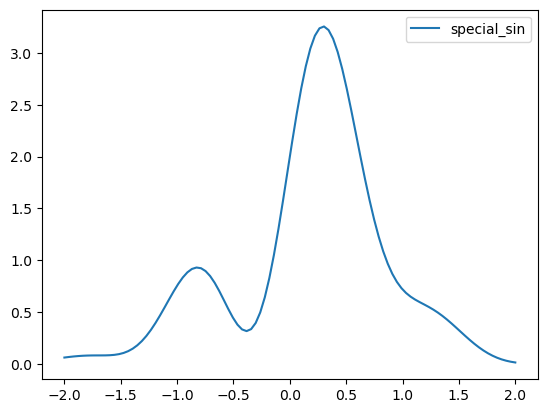

In [293]:

seed = np.array([0])
std = 0.1
burn_in_ITERATION = 1000
lag = 10
max_ITERATION = 10000 

YS = metro_sample(special_sin,seed, std, burn_in_ITERATION, lag, max_ITERATION).flatten()
XS = np.linspace(-2,2,100)

plt.plot(XS,[special_sin([x]) for x in XS], label='special_sin')
plt.legend()
plot_trace_vs_hist_2d(list(range(len(YS))), YS)
plt.show()




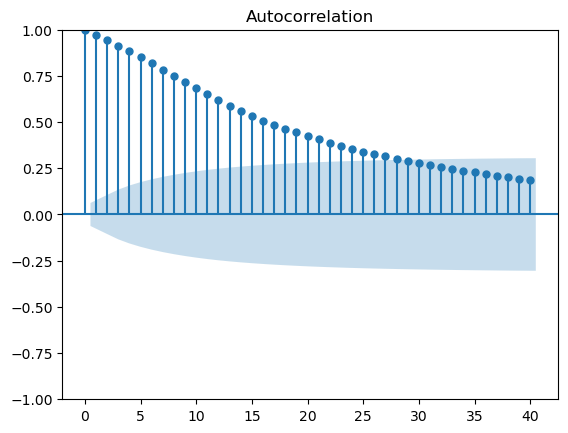

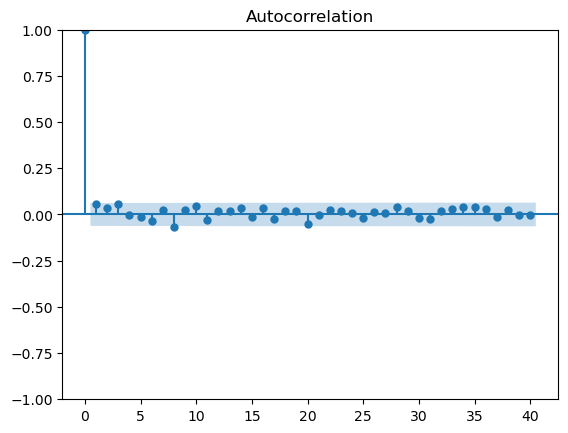

In [294]:
seed = np.array([0])
std = 0.1
burn_in_ITERATION = 10
lag = 1
max_ITERATION = int(1e3)
YS = metro_sample(special_sin,seed, std, burn_in_ITERATION, lag, max_ITERATION).flatten()
plot_acf(YS, lags=40)
plt.show()

seed = np.array([0])
std = 0.1
burn_in_ITERATION = 10
lag = 1e3
max_ITERATION = int(1e6)
YS = metro_sample(special_sin,seed, std, burn_in_ITERATION, lag, max_ITERATION).flatten()
plot_acf(YS, lags=40)
plt.show()



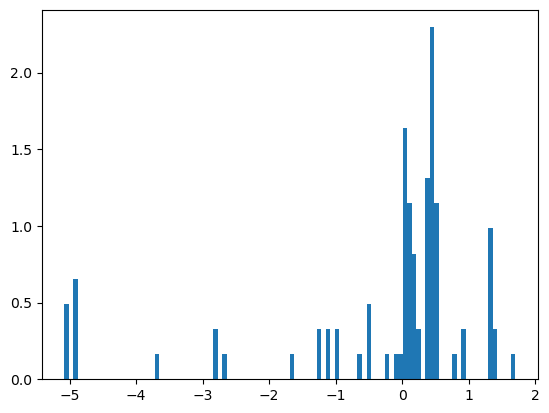

In [ ]:
# touch seed far and std big [-99], 90 works
# [-9], 1 shows walk
seed = np.array([-9])
std = 1
burn_in_ITERATION = 10
lag = 1
max_ITERATION = int(1e2)
YS = metro_sample(special_sin,seed, std, burn_in_ITERATION, lag, max_ITERATION).flatten()

plt.hist(YS, bins=100, density=True)
plt.show()


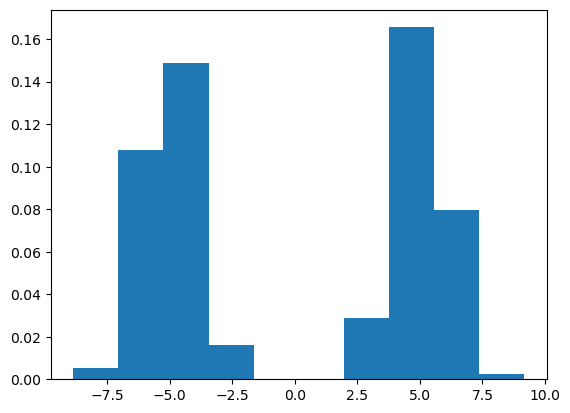

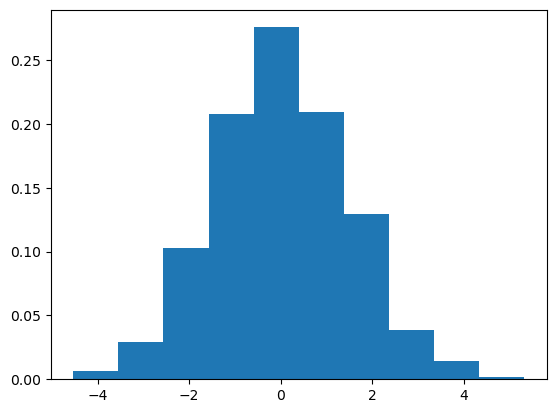

In [529]:
def multimodal_function(x):
    x = x[0]
    unif = np.random.uniform()
    if unif < 0.5:
        return  np.random.normal(loc=5, scale=1)
    else:
        return  np.random.normal(loc=-5, scale=1)
    
def multimodal_pdf(x):
    unif = np.random.uniform()
    if unif < 0.5:
        return 0.5 * np.exp(-(x - 5) ** 2)
    else:
        return 0.5 * np.exp(-(x + 5) ** 2)



Xs = np.linspace(-10,10,10000)
plt.hist([multimodal_function([x]) for x in Xs],  density=True)
plt.show()

seed = np.array([0])
std = 0.1
burn_in_ITERATION = 2e3
lag = 1e3
max_ITERATION = int(1e6)

YS = metro_sample(multimodal_pdf,seed, std, burn_in_ITERATION, lag, max_ITERATION).flatten()
plt.hist(YS, density=True)
plt.show()

In [148]:
def f(x):
    x,y = x
    if x >= 0 and x<= 1 and y >= 0 and y <= 1:
        return 1/2
    elif x >= 1 and x <= 2 and y>= 0 and y<=1:
        return 1/8 
    elif x >= 0 and x <= 1 and y >=1 and y <= 2:
        return 1/8
    elif x >= 1 and x <= 2 and y >= 1 and y <= 2:
        return 1/4
    return 0

seed = [-1,-2]
std = 1
burn_in_ITERATION = 10000
lag = 1000
max_ITERATION = int(1e6)
XS, YS = metro_sample(f,seed, std, burn_in_ITERATION, lag,max_ITERATION ).T

plot2d(XS, YS, "Aj_pro's special")

In [ ]:
seed = [-2,-2]
std = 1
burn_in_ITERATION = 10
lag = 1
max_ITERATION = int(3e3)
XS, YS = metro_sample(f,seed, std, burn_in_ITERATION, lag,max_ITERATION ).T

plot2d(XS, YS, "Aj_pro's special with no burn in and no lag")

# spam hit this for funny results

In [208]:
def f_circle(x):
    x, y = x
    center_x, center_y = 1, 1  
    a = 1 
    b = 1 
    if ((x - center_x) ** 2) / (a ** 2) + ((y - center_y) ** 2) / (b ** 2) <= 1:
        return 1 / (np.pi * a * b) 
    return 0  

def f_circle_normalized(x):
    x, y = x
    if x**2 + y**2 <= 1:
        return 1/np.pi
    return 0

seed = [0,0]
std = 1
burn_in_ITERATION = 10000
lag = 1000
max_ITERATION = int(1e6)
XS, YS = metro_sample(f_circle, seed, std, burn_in_ITERATION, lag, max_ITERATION).T
plot2d(XS, YS, "Circle")


In [320]:
seed = [0,0]
std = 1
burn_in_ITERATION = 10000
lag = 1000
max_ITERATION = int(1e6)
XS, YS = metro_sample(f_circle_normalized, seed, std, burn_in_ITERATION, lag, max_ITERATION).T
plot2d(XS, YS, "Circle")


In [352]:
# rellana twin moons
def f_rellana(x):
    x, y = x
    center_x, center_y = 1, 1  
    radius = 1  


    # center_x2, center_y2 = 2, 0

    center_x2, center_y2 = 5, 5

    if (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2:
        return 1  
    
    if (x - center_x2) ** 2 + (y - center_y2) ** 2 <= radius ** 2:
        return 1
    return 0  

seed = [0,0]
std = 1
burn_in_ITERATION = 10
lag = 1000
max_ITERATION = int(1e6)
XS, YS = metro_sample(f_rellana, seed, std, burn_in_ITERATION, lag, max_ITERATION).T
plot2d(XS, YS, "Rellana")




In [ ]:
seed = [0,0]
std = 1
burn_in_ITERATION = 10
lag = 1e5
max_ITERATION = int(1e7)
XS_lagged, YS_lagged = metro_sample(f_rellana, seed, std, burn_in_ITERATION, lag, max_ITERATION).T
plot2d(XS_lagged, YS_lagged, "Rellana_lagged hard")


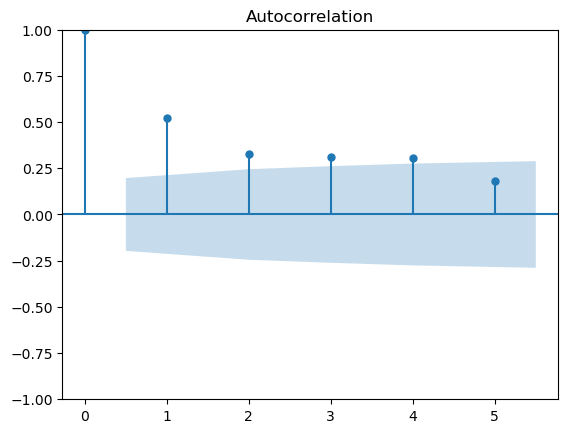

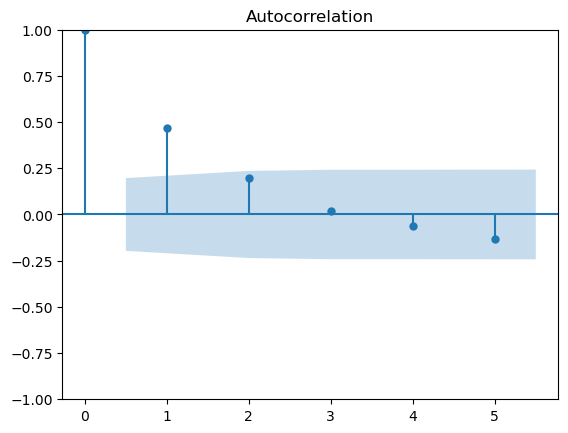

In [237]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(XS, lags=5)
plt.show()

plot_acf(XS_lagged, lags=5)
plt.show()


In [356]:
def rosenblock(x):
    x,y = x
    a = 1
    b = 100
    return math.exp(-((a-x)**2 + b*(y-x**2)**2)/20)


seed = [0,0]
std = 1
burn_in_ITERATION = 1e3
lag = 1000

max_ITERATION = int(1e6)

XS, YS = metro_sample(rosenblock, seed, std, burn_in_ITERATION, lag, max_ITERATION).T
plot2d(XS, YS, "Rosenblock")


Curse of dimensionality will bite us here, n-> grows need to sample more
and it will be harder for the random walk to hit the region of interest

In [370]:

def three_d_sphere(x):
    x, y, z = x
    if x**2 + y**2 + z**2 <= 1:
        return 1/(4/3*np.pi)
    return 0

def multi_variate_normal(x):
    x, y,z  = x

    return np.exp(-x**2/2) * np.exp(-y**2/2) * np.exp(-z**2/2)

seed = [0,0,0]
std = 1
burn_in_ITERATION = 1000
lag = 100
max_ITERATION = int(1e6)
XS, YS, ZS = metro_sample(multi_variate_normal, seed, std, burn_in_ITERATION, lag, max_ITERATION).T
def plot3d(XS, YS, ZS):
    fig = go.Figure(data=[go.Scatter3d(x=XS, y=YS, z=ZS, mode='markers')])
    fig.show()

plot3d(XS, YS, ZS)



<h1> using MCMC to evaluate posterior </h1>

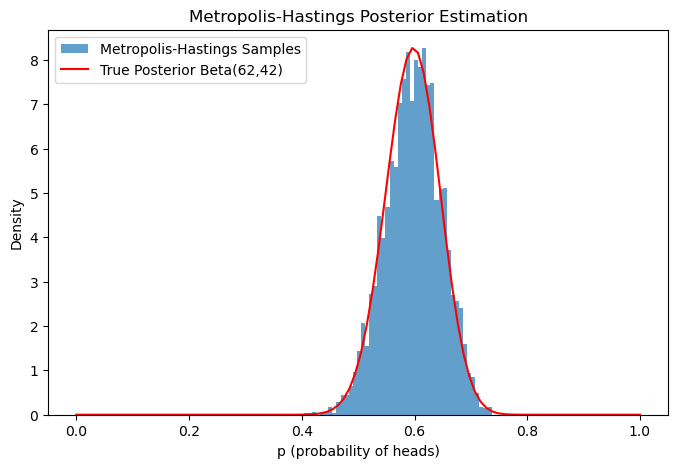

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def prior(p):
    return stats.beta.pdf(p, 2, 2)  


def likelihood(p, k, N):
    return stats.binom.pmf(k, N, p)  


def metropolis_hastings(iterations, k, N, proposal_std=0.1):
    samples = []
    p_current = np.random.rand() 
    for _ in range(iterations):
        p_proposed = np.clip(np.random.normal(p_current, proposal_std), 0, 1)  

       
        posterior_current = likelihood(p_current, k, N) * prior(p_current)
        posterior_proposed = likelihood(p_proposed, k, N) * prior(p_proposed)
        acceptance_ratio = min(1, posterior_proposed / posterior_current)

       
        if np.random.rand() < acceptance_ratio:
            p_current = p_proposed

        samples.append(p_current)

    return np.array(samples)


np.random.seed(42)
samples = metropolis_hastings(iterations=10000, k=60, N=100)


plt.figure(figsize=(8,5))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Metropolis-Hastings Samples")
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 62, 42), 'r-', label="True Posterior Beta(62,42)")
plt.xlabel("p (probability of heads)")
plt.ylabel("Density")
plt.legend()
plt.title("Metropolis-Hastings Posterior Estimation")
plt.show()


<h1> another fun application </h1>



In [ ]:
# travelling sales man

distance_dict1 = dict()

att48 = open("att48.txt", "r")
arr = [line.strip().split() for line in att48]

arr2 = [list(map(float, x)) for x in arr]

for i in range(len(arr2)):
    for j in range(len(arr2)):
        distance_dict1[(i+1,j+1)] = arr2[i][j]

seed = list(range(0, 48)) + [0]

best = [1,8,38,31,44,18,7,28,6,37,19,27,17,43,30,36,46,33,20,47,21,32,39,48,5,42,24,10,45,35,4,26,2,29,34,41,16,22,3,23,14,25,13,11,12,15,40,9,1]

    
def TSP_MCMC(mem, n):
    def calc_distance(path, mem):
        distance = 0
        for i in range(len(path)-1):
            distance += mem[(path[i], path[i+1])]
        return distance
    
    def swap(path):
        path = path.copy()
        i,j = np.random.choice(range(1,len(path)-1), 2)
        path[i], path[j] = path[j], path[i]
        return path
    
    global_best_dist  = calc_distance(best, mem)
    print(global_best_dist)
   

    path = [1] + list(np.random.permutation(range(2,n))) + [1]
    best_dist = calc_distance(path, mem)

   


    for i in range(int(2e5)):
    
        distance = calc_distance(path, mem)
        path2 = swap(path)
        distance2 = calc_distance(path2, mem)

        if distance2 < best_dist:
            best_dist = distance2

        delta = distance2 - distance
        if delta < 0:
            path = path2
        else:
            u = np.random.uniform()
            if u < np.exp(-delta/i):
                path = path2
    return best_dist
     
    

distance = TSP_MCMC(distance_dict1, 48)
print( distance)

33551.0
67679.0


In [ ]:
def knapsack(weight_list, value_list, capacity):
    def knapsackhelper(index, weight_list, value_list,current_weight, capacity, mem):
        if index < 0 or capacity <= 0:
            mem[(index, capacity)] = 0
            return 0
        if weight_list[index] > capacity:
            mem[(index, capacity)] = knapsackhelper(index-1, weight_list, value_list,current_weight, capacity, mem)
            return mem[(index, capacity)]
        val1 = knapsackhelper(index-1, weight_list, value_list,current_weight, capacity, mem)
        val2 = knapsackhelper(index-1, weight_list, value_list,current_weight + weight_list[index], capacity - weight_list[index], mem) + value_list[index]
        best_val = max(val1, val2)
        mem[(index, capacity)] = best_val
        return best_val
    mem = dict()

    return knapsackhelper(len(weight_list)-1, weight_list, value_list, 0, capacity, mem)



dict1 = dict()
dict1["ln"]  = lambda x: np.log(x)
dict1["nln"] = lambda x: x*np.log(x)
dict1["exp"] = lambda x: np.exp(x)
dict1["n"]  =  lambda x: x

def mcmcKnapsack(weight_list, value_list, capacity, multiplier_mode, constant_multiplier):
    Xs = [0 for _ in range(len(weight_list))]
    bestXs = Xs 

    n = len(weight_list)

    multipier = int(dict1[multiplier_mode](n) * constant_multiplier)


    for _ in range(multipier):

        k = np.random.choice(range(len(weight_list)))
        Xs2 = Xs.copy()
        Xs2[k] = 1 - Xs[k]
        if sum([a*b for a,b in zip(Xs2, weight_list)]) <= capacity:
            if sum([a*b for a,b in zip(Xs2, value_list)]) > sum([a*b for a,b in zip(bestXs, value_list)]):
                bestXs = Xs2
            Xs = Xs2
    print(bestXs)
    print(sum([a*b for a,b in zip(bestXs, value_list)]))
  

profit = [60, 100, 120]
weight = [10, 20, 30]
W = 50




print(knapsack(weight, profit, W))
mcmcKnapsack(weight, profit, W, "nln", 4)


[0, 1, 1]
220
220


In [502]:
np.random.seed(123)

profit = np.random.randint(1, 500, 10)
weight = np.random.randint(1,100,10)

W = 1000

print(knapsack(weight, profit, W))
print(mcmcKnapsack(weight, profit, W, "nln", 4))

2212
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
2194
None


<h1> references </h1>

https://arxiv.org/pdf/1504.01896
https://statswithr.github.io/book/the-basics-of-bayesian-statistics.html
https://web.stanford.edu/class/archive/cs/cs109/cs109.1218/files/student_drive/9.6.pdf
https://gregorygundersen.com/blog/2019/11/02/metropolis-hastings/
https://gregorygundersen.com/blog/2019/11/02/metropolis-hastings/